# DSAI PROJECT

Dataset: https://www.kaggle.com/datasets/akshay4/road-accidents-incidence

**Our problem: How can we accurately predict the severity of traffic accidents (using geographical area, human factors, environmental conditions, vehicle conditions)? How can we effectively lower the severity of traffic accidents?**

This notebook will focus only on the numeric data which are:

- Number of Vehicles
- Number of Casualties
- Speed limit
- Age of Driver
- Engine Capacity
- Age of Vehicle (manufacture)
- Age of Casualty


In [7]:
#import the essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

Importing the dataset

In [8]:
data_csv = pd.read_csv('Accidents(1).csv')

data_csv.head()

/Users/sahana/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Vehicle_Reference.2,Casualty_Reference.1,Casualty_Class.1
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,4/1/05,...,1,1,0,0,-1,0,1,1,1,3
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,5/1/05,...,0,0,0,4,-1,11,1,1,1,2
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,6/1/05,...,0,0,0,0,-1,9,1,2,1,1
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,7/1/05,...,5,2,0,0,-1,0,1,1,1,3
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/1/05,...,0,0,0,0,-1,3,-1,1,1,1


## Exploratory Data Analysis

In [9]:
data_df = pd.DataFrame(data_csv)
data_numeric = pd.DataFrame(data_df[['Number_of_Vehicles','Number_of_Casualties','Speed_limit','Age_of_Vehicle','Engine_Capacity_(CC)','Age_of_Casualty','Age_of_Driver']])

data_numeric.describe()

,Number_of_Vehicles,Number_of_Casualties,Speed_limit,Age_of_Vehicle,Engine_Capacity_(CC),Age_of_Casualty,Age_of_Driver
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.835030e+00,1.359930e+00,3.943654e+01,4.218317e+00,1.358289e+03,3.342812e+01,3.341957e+01
std,7.181454e-01,8.223645e-01,1.431206e+01,5.064043e+00,1.714334e+03,1.868673e+01,1.903613e+01
min,1.000000e+00,1.000000e+00,1.000000e+01,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,1.000000e+00,1.000000e+00,3.000000e+01,-1.000000e+00,-1.000000e+00,1.900000e+01,2.100000e+01
50%,2.000000e+00,1.000000e+00,3.000000e+01,3.000000e+00,1.360000e+03,3.000000e+01,3.300000e+01
75%,2.000000e+00,1.000000e+00,5.000000e+01,8.000000e+00,1.834000e+03,4.500000e+01,4.600000e+01
max,3.200000e+01,6.800000e+01,7.000000e+01,8.700000e+01,9.999900e+04,9.900000e+01,9.900000e+01


Basic statistical summary using boxplot, histogram and violinplot

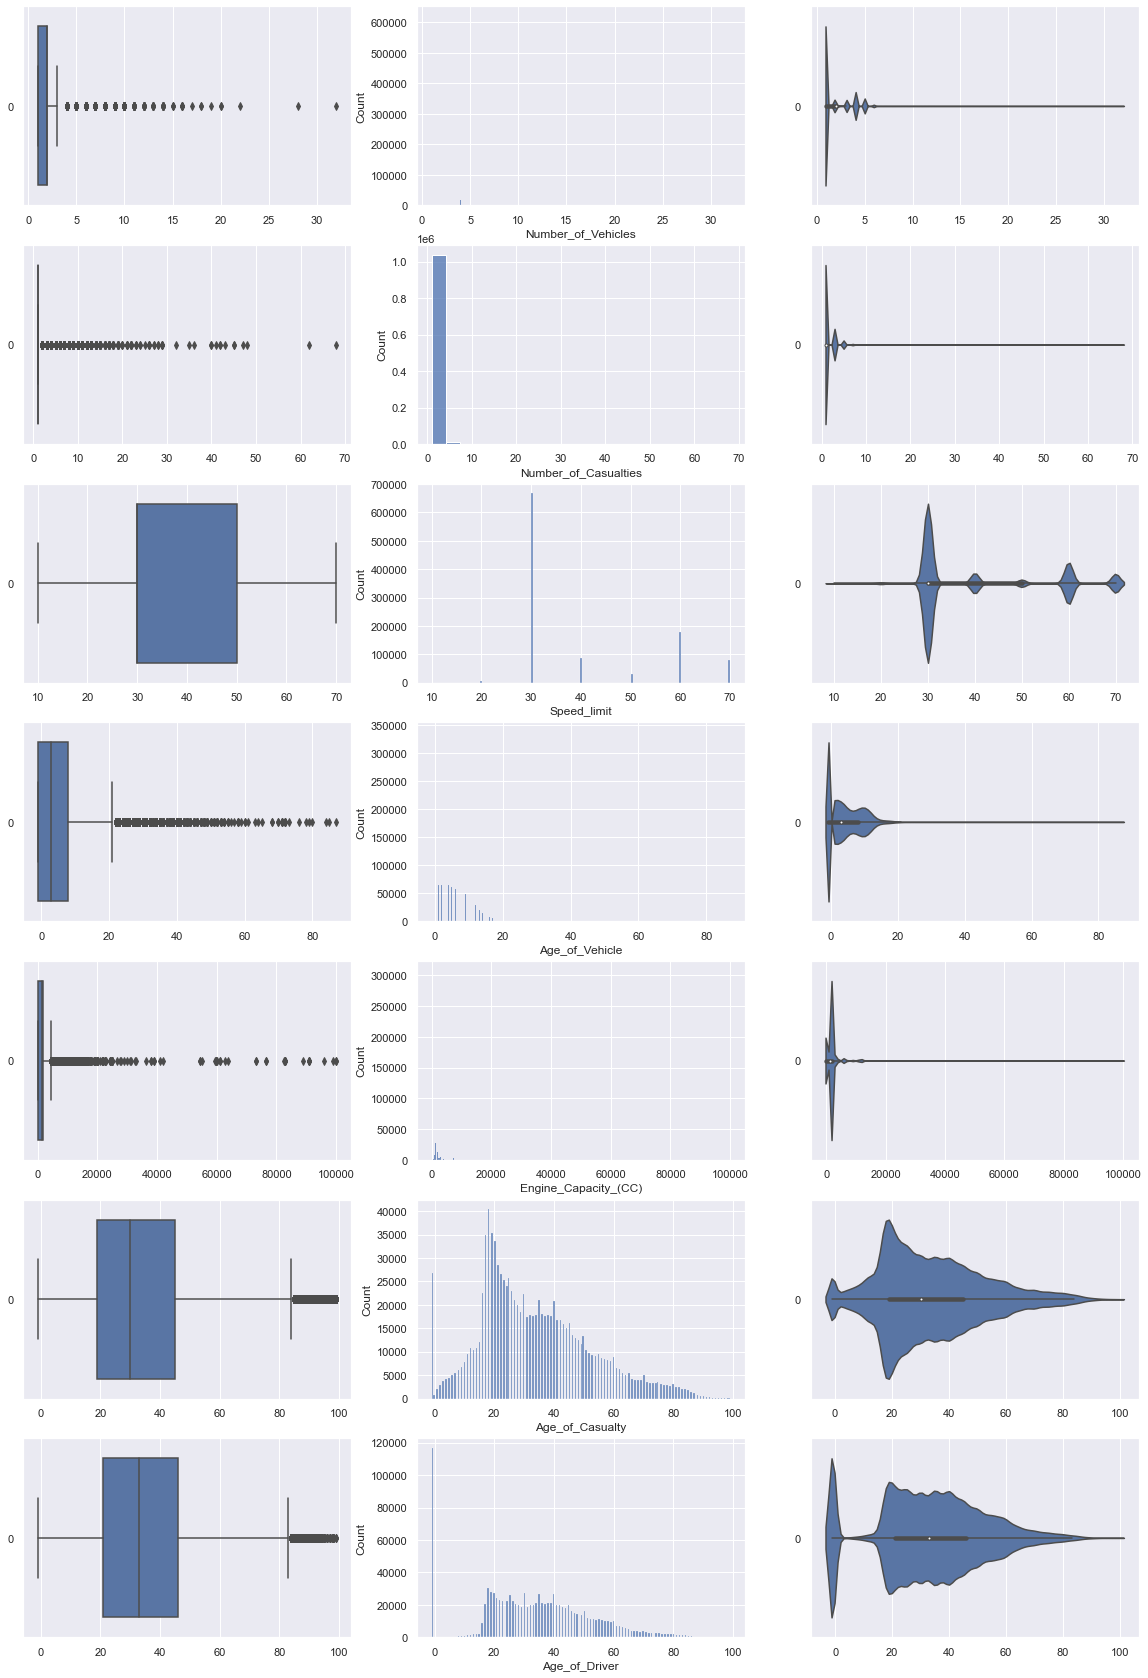

In [4]:
f, axes = plt.subplots(7, 3, figsize=(20, 30))

index = 0
for var in data_numeric:
    sb.boxplot(data = data_numeric[var], orient = "h", ax = axes[index,0])
    sb.histplot(data = data_numeric[var], ax = axes[index,1])
    sb.violinplot(data = data_numeric[var], orient = "h", ax = axes[index,2])
    index += 1

Plotting a correlation heat map

<AxesSubplot:>

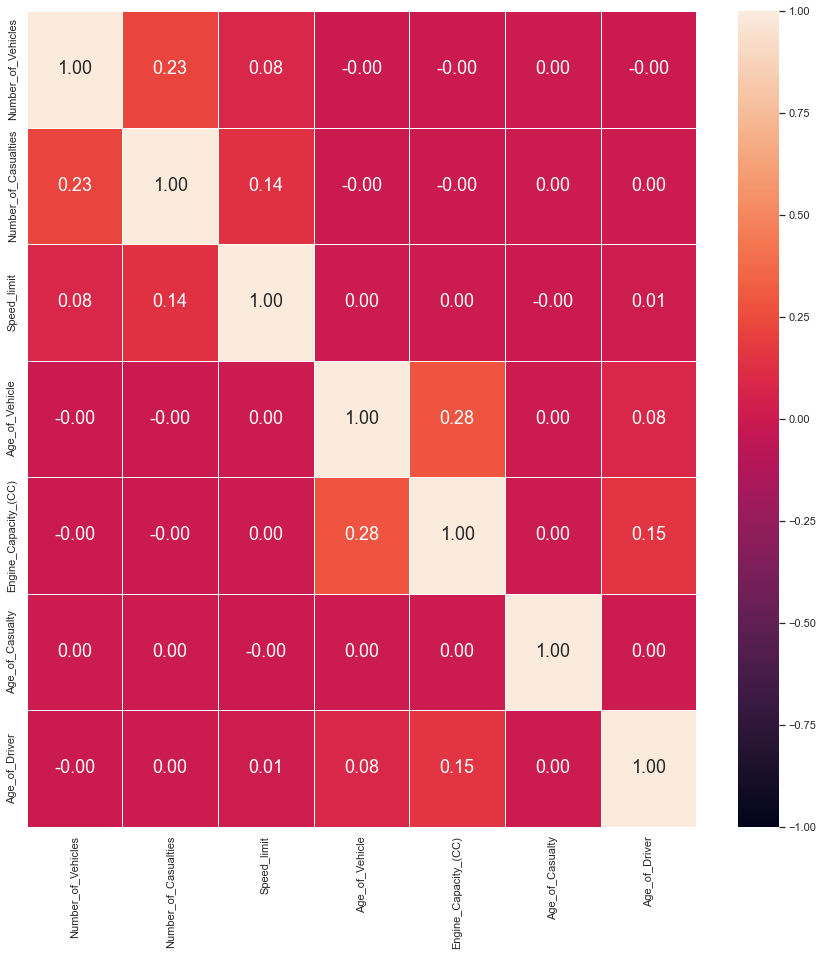

In [5]:
f = plt.figure(figsize=(15, 15))
sb.heatmap(data_numeric.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18})

Based on the analysis so far, we can see that age of casuality does not really matter.<br>

The **number of vehicles and number of casualties** are somewhat correlated which makes sense because if there are more vehicles then more people would be injured.
<br>
<br>
The **age of the vehicle and engine capacity** are somewhat correlated as well which makes sense because if the car is older, the engine capacity should be lower as well.
<br>
<br>
The **age of the driver and engine capacity** are somewhat correlated as well.
<br>
<br>
The **speed limit and number of casualties** are somewhat correlated which makes sense because if the speed is high then the impact on injury will be high as well.

<AxesSubplot:xlabel='Accident_Severity', ylabel='Number_of_Casualties'>

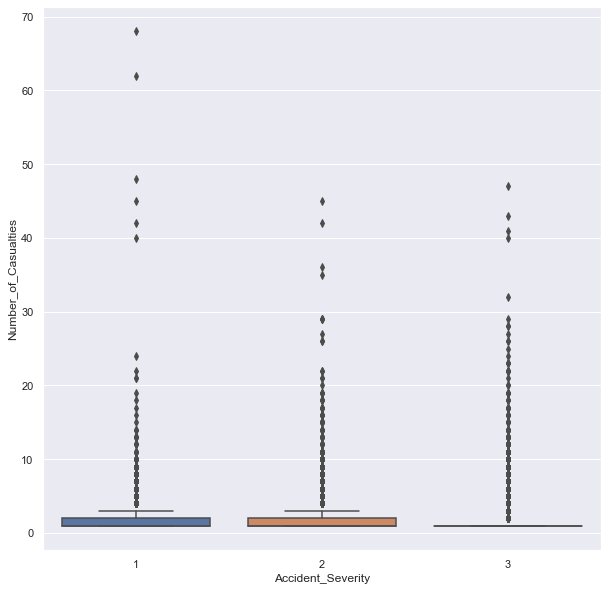

In [6]:
f = plt.figure(figsize=(10,10))
sb.boxplot(x="Accident_Severity",y="Number_of_Casualties",data=data_df,orient = 'v')

So number of casualties does affect the accident severity in the sense that with higher number of casualties, the accident is more severe.

<AxesSubplot:xlabel='Accident_Severity', ylabel='Number_of_Vehicles'>

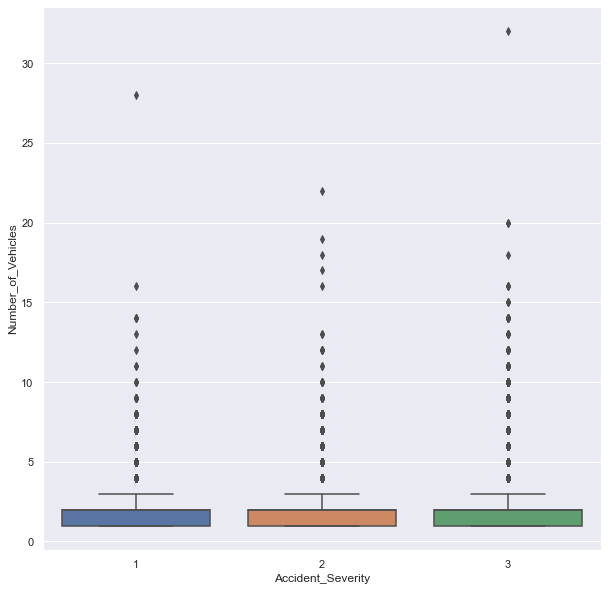

In [7]:
f = plt.figure(figsize=(10,10))
sb.boxplot(x="Accident_Severity",y="Number_of_Vehicles",data=data_df,orient = 'v')

So number of vehicles doesn't affect accident severity that much

<AxesSubplot:xlabel='Accident_Severity', ylabel='Age_of_Vehicle'>

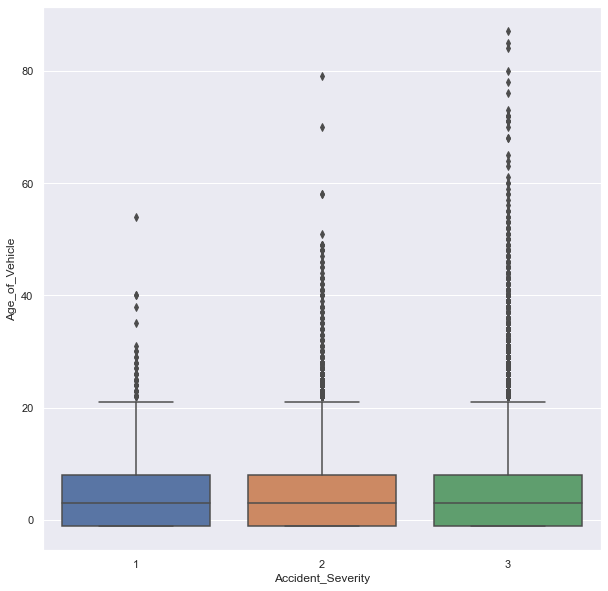

In [8]:
f = plt.figure(figsize=(10,10))
sb.boxplot(x="Accident_Severity",y="Age_of_Vehicle",data=data_df,orient = 'v')

So the age of the vehicle doesn't affect the accident severity that much. It is interesting to note that older cars actually cause less severe accidents as shown by the outliers in the boxplot for accident severity 3.

<AxesSubplot:xlabel='Accident_Severity', ylabel='Speed_limit'>

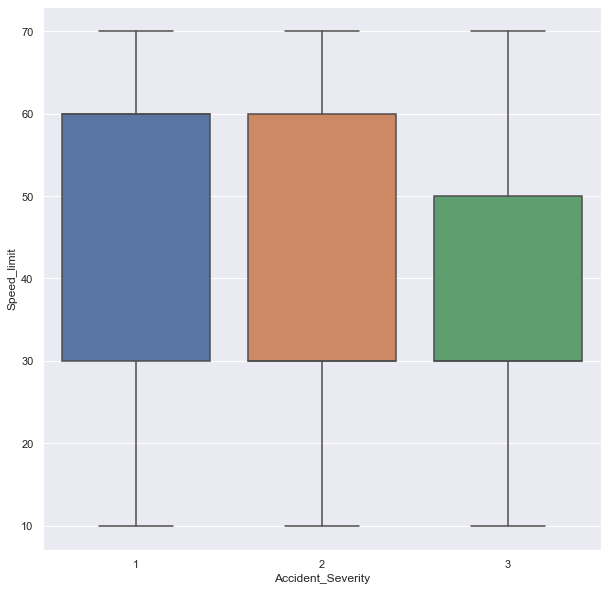

In [9]:
f = plt.figure(figsize=(10,10))
sb.boxplot(x="Accident_Severity",y="Speed_limit",data=data_df,orient = 'v')

So this shows that the speed limit does affect accident severity to a certain extent. Lower range of speed limit causes less severe accidents.

<AxesSubplot:xlabel='Accident_Severity', ylabel='Engine_Capacity_(CC)'>

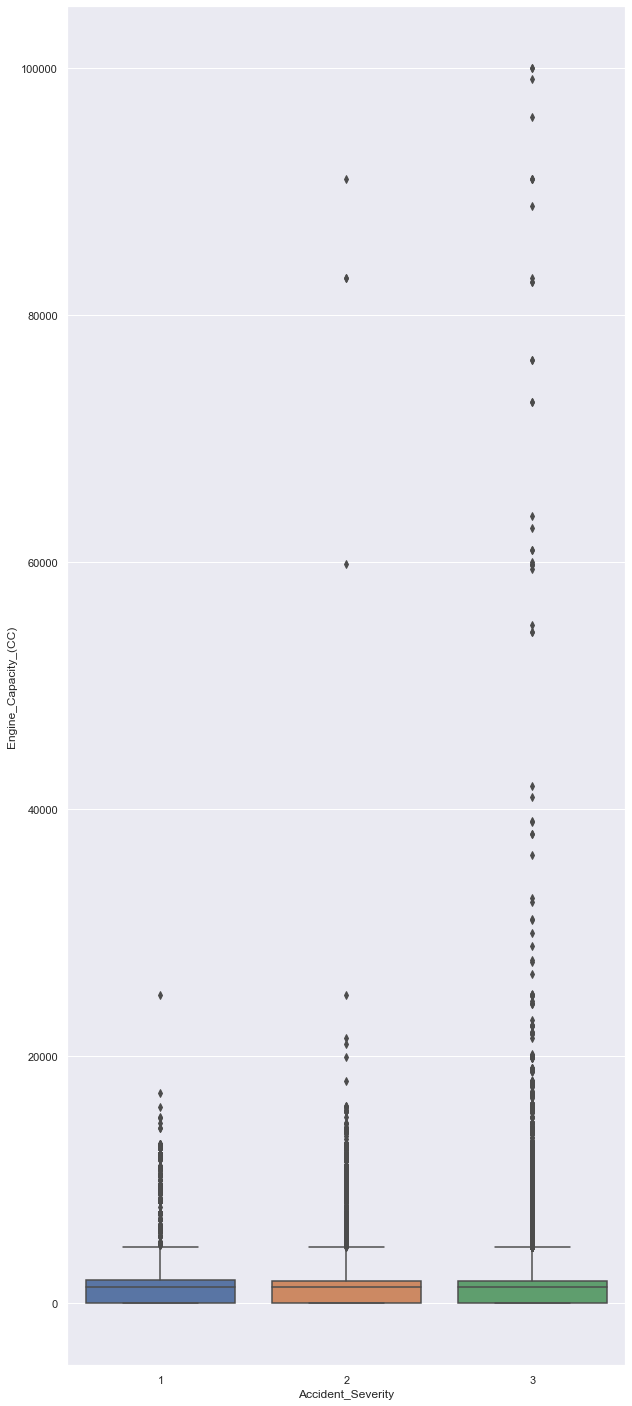

In [10]:
f = plt.figure(figsize=(10,25))
sb.boxplot(x="Accident_Severity",y="Engine_Capacity_(CC)",data=data_df,orient = 'v')

So engine capacity doesn't really affect accident severity

<AxesSubplot:xlabel='Accident_Severity', ylabel='Age_of_Driver'>

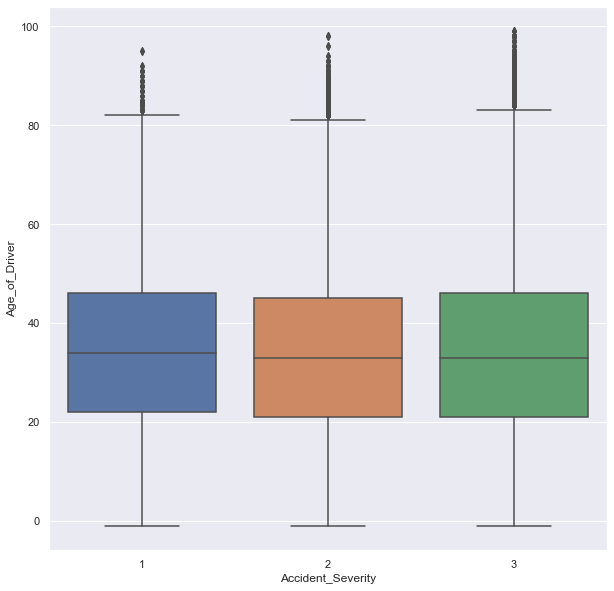

In [11]:
f = plt.figure(figsize=(10,10))
sb.boxplot(x="Accident_Severity",y="Age_of_Driver",data=data_df,orient = 'v')

So the age of driver doesn't really affect accident severity

<AxesSubplot:xlabel='Accident_Severity', ylabel='Age_of_Casualty'>

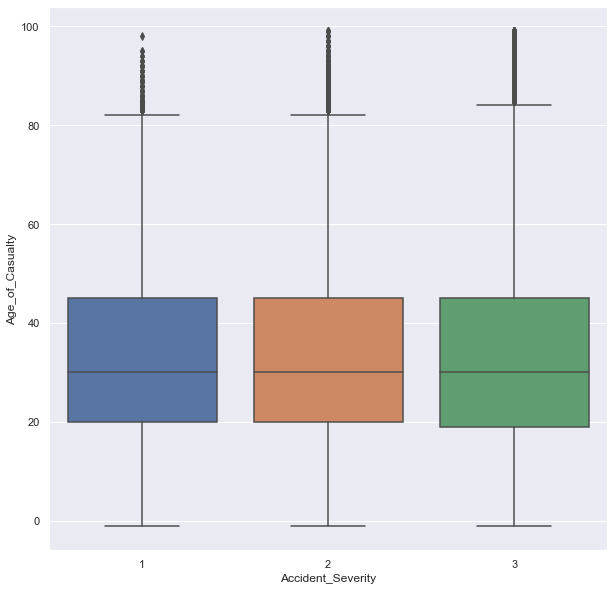

In [10]:
f = plt.figure(figsize=(10,10))
sb.boxplot(x="Accident_Severity",y="Age_of_Casualty",data=data_df,orient = 'v')

So the age of casualty doesn't affect the accident severity as well

After exploring the numeric variables, the main variables that affect accident severity are:
<br>
<br>
**Number_of_Casualties
<br><br>
Speed_limit**

## Machine Learning

In [12]:
#Importing Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt 
import scipy.stats as stats
plt.rc("font", size=14)
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import imblearn

from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

In [13]:
accident = pd.DataFrame(data_df['Accident_Severity']) # response

### Random Forest Classifer Model for all numeric data

/var/folders/86/zzcvwkjn1mv4b0b5lwk31xch0000gr/T/ipykernel_44255/1646325793.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


Random Forest Classifier Accuracy: 0.9073129345699347


No handles with labels found to put in legend.


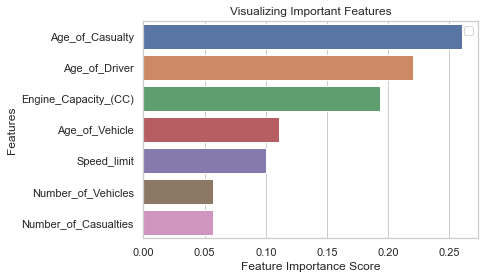

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data_numeric,accident, test_size = 0.25)
X = X_train
y = y_train

#Balancing our imbalanced dataset
oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority') 
X_over, y_over = oversample.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_over,y_over, test_size = 0.25)

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model 
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred))

# get importance
importance = clf.feature_importances_

# Print feature importance values
#print('Feature: %s, Score: %.5f' % ("Speed_limit",importance[0]))
#print('Feature: %s, Score: %.5f' % ("Number_of_Casualties",importance[1]))

%matplotlib inline
# Creating a bar plot
feature_imp = pd.Series(clf.feature_importances_,index=['Number_of_Vehicles','Number_of_Casualties','Speed_limit','Age_of_Vehicle','Engine_Capacity_(CC)','Age_of_Casualty','Age_of_Driver']).sort_values(ascending=False)
sb.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
pyplot.xlabel('Feature Importance Score')
pyplot.ylabel('Features')
pyplot.title("Visualizing Important Features")
pyplot.legend()
pyplot.show()

Through this model, Age_of_Casualty is the most important feature. But according to our EDA, we found Speed_limit and Number_of_Casualties to be more important in determining Accident_Severity. Since, Number_of_Casualties has the least feature importance, we will explore both **Age_of_Casualty and Speed_limit** in two seperate models instead.

## Machine Learning: Speed_limit

In [17]:
speed = pd.DataFrame(data_df['Speed_limit']) #predictor
accident = pd.DataFrame(data_df['Accident_Severity']) # response

In [331]:
X_train, X_test, y_train, y_test = train_test_split(speed,accident, test_size = 0.25)
X = X_train
y = y_train

#Balancing our imbalanced dataset
oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority') 
X_over1, y_over1 = oversample.fit_resample(X, y)
sample_df1_x = pd.DataFrame(X_over1)
sample_df1_y = pd.DataFrame(y_over1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_over1,y_over1, test_size = 0.25)

### Logistic Regression model for Speed_limit

/Users/sahana/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Goodness of Fit of Model 	Train Dataset
Accuracy 	: 0.6116326158369982
Mean Squared Error (MSE) 	: 1.3382860417085047

Goodness of Fit of Model 	Test Dataset
Accuracy 	: 0.6106150423523885
Mean Squared Error (MSE) 	: 1.3419115919799913

The recall for this model is : 0.6106150423523885


/Users/sahana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sahana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sahana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.65      0.58      0.61    167878
           2       0.00      0.00      0.00     26008
           3       0.58      0.74      0.65    167959

    accuracy                           0.61    361845
   macro avg       0.41      0.44      0.42    361845
weighted avg       0.57      0.61      0.59    361845



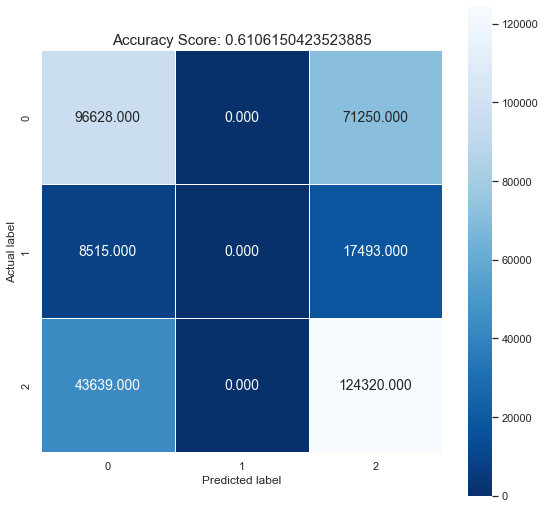

In [19]:
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)

y_train_pred1 = logreg.predict(X_train1)
y_test_pred1 = logreg.predict(X_test1)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy \t:", logreg.score(X_train1, y_train1))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train1, y_train_pred1))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Accuracy \t:", logreg.score(X_test1, y_test1))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test1, y_test_pred1))
print()

score = logreg.score(X_test1, y_test1)
matrix = metrics.confusion_matrix(y_test1, y_test_pred1)
plt.figure(figsize=(9,9))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

matrix = metrics.confusion_matrix(y_test1, y_test_pred1)

print("The recall for this model is :",((matrix[0,0]+matrix[1,1]+matrix[2,2])/((matrix[0,0]+matrix[1,1]+matrix[2,2]) + (matrix[0,1]+matrix[0,2]+matrix[1,0]+matrix[1,2]+matrix[2,0]+matrix[2,1]))))

report = classification_report(y_test1, y_test_pred1)
print(report)

### Random Forest Classifier Model for Speed_limit

In [20]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model 
clf.fit(X_train1,y_train1)

y_pred1 = clf.predict(X_test1)

# Model Accuracy, how often is the classifier correct?
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

report = classification_report(y_test1, y_pred1)
print(report)

/var/folders/86/zzcvwkjn1mv4b0b5lwk31xch0000gr/T/ipykernel_44255/4029384480.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train1,y_train1)


Random Forest Classifier Accuracy: 0.6153491135707277
              precision    recall  f1-score   support

           1       0.62      0.67      0.64    167878
           2       0.00      0.00      0.00     26008
           3       0.61      0.66      0.63    167959

    accuracy                           0.62    361845
   macro avg       0.41      0.44      0.43    361845
weighted avg       0.57      0.62      0.59    361845



/Users/sahana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sahana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sahana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Based on the two models, we have decided to go with the **classifier model**. Both models have similar classification accuracy. But for our problem, having a higher recall for the severe category 0 /feature 1 is more important. If severe accidents are classfied wrongly as not severe, it will be a disaster. the emergency resources won't be allocated correctly. Future infrastructure planning will be done wrongly. Therefore, we need to focus on lowering our False Negative rate. Recall would be a better metric to use to select the best model when there is a high cost associated with False Negative. Hence, we have decided to use the second Random Classifier Model. 

## Machine Learning: Age_of_Casualty

In [23]:
age = pd.DataFrame(data_df['Age_of_Casualty']) #predictor
accident = pd.DataFrame(data_df['Accident_Severity']) # response

In [27]:
X_train, X_test, y_train, y_test = train_test_split(age,accident, test_size = 0.25,random_state=1)
X = X_train
y = y_train

#Balncing our imbalanced dataset
oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')
X_over2, y_over2 = oversample.fit_resample(X, y)
sample_df2 = pd.DataFrame(X_over2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_over2,y_over2, test_size = 0.25,random_state=1)

### Logistic Regression model for Age_of_Casualty

/Users/sahana/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Goodness of Fit of Model 	Train Dataset
Accuracy 	: 0.465346151578575
Mean Squared Error (MSE) 	: 1.923520730772632

Goodness of Fit of Model 	Test Dataset
Accuracy 	: 0.4656373153219878
Mean Squared Error (MSE) 	: 1.9230418465313974

The recall for this model is : 0.4656373153219878


/Users/sahana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sahana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sahana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.46      0.50      0.48    167654
           2       0.00      0.00      0.00     25861
           3       0.47      0.51      0.49    168331

    accuracy                           0.47    361846
   macro avg       0.31      0.33      0.32    361846
weighted avg       0.43      0.47      0.45    361846



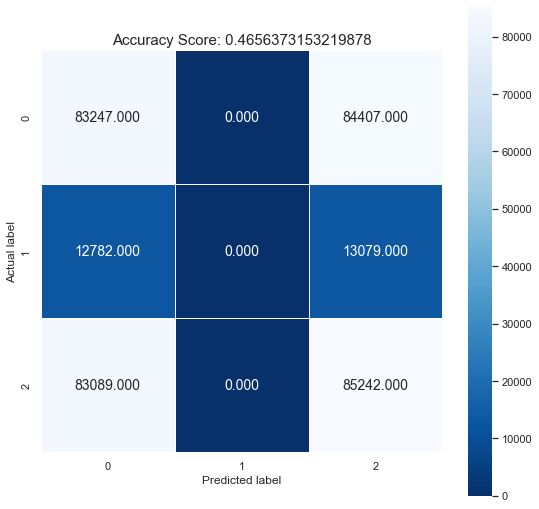

In [25]:
logreg = LogisticRegression()
logreg.fit(X_train2, y_train2)

y_train_pred2 = logreg.predict(X_train2)
y_test_pred2 = logreg.predict(X_test2)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy \t:", logreg.score(X_train2, y_train2))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train2, y_train_pred2))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Accuracy \t:", logreg.score(X_test2, y_test2))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test2, y_test_pred2))
print()

score = logreg.score(X_test2, y_test2)
matrix = metrics.confusion_matrix(y_test2, y_test_pred2)
plt.figure(figsize=(9,9))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

matrix = metrics.confusion_matrix(y_test2, y_test_pred2)

print("The recall for this model is :",((matrix[0,0]+matrix[1,1]+matrix[2,2])/((matrix[0,0]+matrix[1,1]+matrix[2,2]) + (matrix[0,1]+matrix[0,2]+matrix[1,0]+matrix[1,2]+matrix[2,0]+matrix[2,1]))))

report = classification_report(y_test2, y_test_pred2)
print(report)

### Random Forest Classifier Model for Age_of_Casualty

In [26]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model 
clf.fit(X_train2,y_train2)

y_pred2 = clf.predict(X_test2)

# Model Accuracy, how often is the classifier correct?
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test2, y_pred2))


report = classification_report(y_test2, y_pred2)
print(report)

/var/folders/86/zzcvwkjn1mv4b0b5lwk31xch0000gr/T/ipykernel_44255/2098845293.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train2,y_train2)


Random Forest Classifier Accuracy: 0.4821249924000818
              precision    recall  f1-score   support

           1       0.48      0.54      0.51    167654
           2       0.00      0.00      0.00     25861
           3       0.48      0.49      0.49    168331

    accuracy                           0.48    361846
   macro avg       0.32      0.35      0.33    361846
weighted avg       0.45      0.48      0.46    361846



/Users/sahana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sahana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sahana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As mentioned earlier, we need a higher recall for the severe category and higher classification accuracy. So, for Age_of_Casualty, the Random Forest Classifier has both a higher classification accuracy and higher recall. Therefore, we will be using the Random Forest Classifier model.

In conclusion, comparing both classification models, even though Age_of_Casualty was a more significant feature, the classification accuracy for Speed_limit is higher. Hence, to answer our first question on how accurately we can predict the severity of accidents, we believe **Speed_limit** is a more important numeric variable in predicting Accident_Severity as a whole. 

## Data Driven Insights

In this section we will answer to our second question.

**Question: How can we effectively lower the severity of traffic accidents?**

It's logical to think that with higher speed, the accident will be more severe. So we wanted to test this out. According to our the boxplot in our EDA for Speed_limit, when the speed is between 50 to 60, the accident tends to have a higher severity.

In [352]:
# sample_df1_x is the over sampled X train values from the previous model for Speed_limit
df = sample_df1_x[(sample_df1_x['Speed_limit'] >= 50) & (sample_df1_x['Speed_limit'] <= 60)].index
print(df)

Int64Index([      3,       6,      11,      20,      24,      31,      34,
                 53,      65,      74,
            ...
            1447392, 1447399, 1447402, 1447403, 1447407, 1447411, 1447414,
            1447422, 1447423, 1447427],
           dtype='int64', length=449451)


We removed majority of the Speed_limit between 50 and 60.

In [353]:
np.random.seed(100)

remove_n = 400000
df = sample_df1_x[(sample_df1_x['Speed_limit'] >= 50) & (sample_df1_x['Speed_limit'] <= 60)].index

drop_indices = np.random.choice(df, remove_n, replace=False)
df_subset = sample_df1_x.drop(drop_indices)

In [354]:
new_df = pd.concat([df_subset,sample_df1_y],axis = 1)
new_df = new_df.dropna()
display(new_df)

,Speed_limit,Accident_Severity
0,30.0,3
1,30.0,3
2,30.0,3
4,30.0,3
5,30.0,3
...,...,...
1447425,70.0,1
1447426,30.0,1
1447428,30.0,1
1447429,30.0,1


## Improved Models for Speed_limit

In [347]:
improved_speed = pd.DataFrame(new_df['Speed_limit']) #predictor
improved_accident = pd.DataFrame(new_df['Accident_Severity']) # response

In [348]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(improved_speed,improved_accident, test_size = 0.25,random_state=1)

### Logistic Regression model for Improved Speed_limit

/Users/sahana/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Goodness of Fit of Model 	Train Dataset
Accuracy 	: 0.5896765800250263
Mean Squared Error (MSE) 	: 1.4125052668561675

Goodness of Fit of Model 	Test Dataset
Accuracy 	: 0.5914426903130704
Mean Squared Error (MSE) 	: 1.4084427437771616

The recall for this model is : 0.5914426903130704
              precision    recall  f1-score   support

           1       0.62      0.30      0.40    101325
           2       0.00      0.00      0.00     19708
           3       0.59      0.88      0.70    140825

    accuracy                           0.59    261858
   macro avg       0.40      0.39      0.37    261858
weighted avg       0.55      0.59      0.53    261858



/Users/sahana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sahana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sahana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


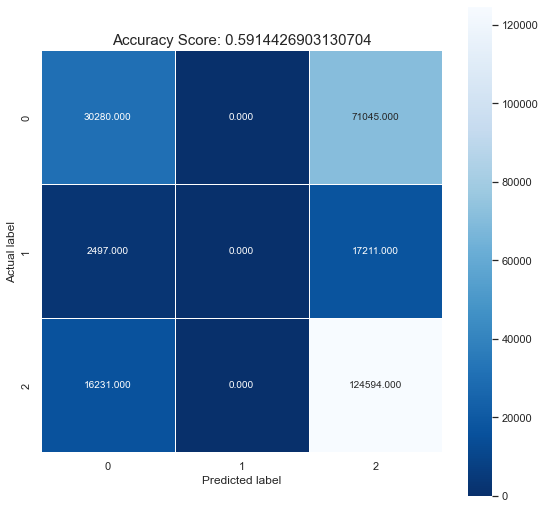

In [349]:
logreg = LogisticRegression()
logreg.fit(X_train3, y_train3)

y_train_pred3 = logreg.predict(X_train3)
y_test_pred3 = logreg.predict(X_test3)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy \t:", logreg.score(X_train3, y_train3))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train3, y_train_pred3))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Accuracy \t:", logreg.score(X_test3, y_test3))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test3, y_test_pred3))
print()

score = logreg.score(X_test3, y_test3)
matrix = metrics.confusion_matrix(y_test3, y_test_pred3)
plt.figure(figsize=(9,9))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

matrix = metrics.confusion_matrix(y_test3, y_test_pred3)

print("The recall for this model is :",((matrix[0,0]+matrix[1,1]+matrix[2,2])/((matrix[0,0]+matrix[1,1]+matrix[2,2]) + (matrix[0,1]+matrix[0,2]+matrix[1,0]+matrix[1,2]+matrix[2,0]+matrix[2,1]))))

report = classification_report(y_test3, y_test_pred3)
print(report)

Comparing the Logistic Regression model for Speed_limit and Improved Speed_limit, we can see that the accuracy is about the same. <br>

But the number of predicted severe and actually severe accidents **decreased by 1/3** from 96628 to 30280. This proves our hypothesis that with lower speeds, the accidents will be less severe. <br>

Therefore, to answer our question about how effectively can we lower the severity of accidents, we should lower the speed limits.